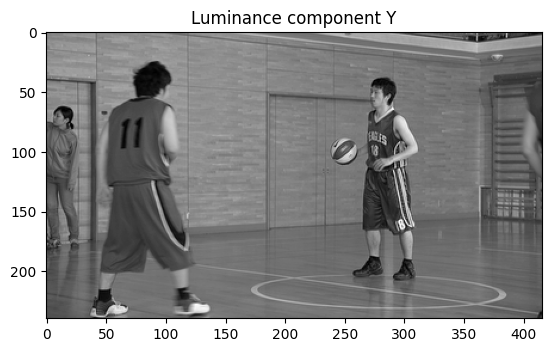

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from yuv_read_one_frame import read_frame
from predict_frame import predict_frame, predict_frame_three_step, predict_frame_half_pixel
from utils import compute_mse

#  use these test sequences
input_video = 'sequences/BasketballPass_416x240_50_10frames.yuv'
# input_video = 'sequences/BlowingBubbles_416x240_50_10frames.yuv';
# input_video = 'sequences/BQSquare_416x240_60_10frames.yuv';
# input_video = 'sequences/RaceHorses_416x240_30_10frames.yuv';
num_frames = 10 # all test sequences consist of 10 frames

# all test sequences have this spatial resolution
width = 416
height = 240

# Example code to demonstrate how to read and visualize a frame
# we only use the luma component Y
frame_number = 0
y, u, v = read_frame(input_video, frame_number, width, height)

plt.figure()
plt.imshow(y, cmap='gray')
plt.title('Luminance component Y')
plt.show()

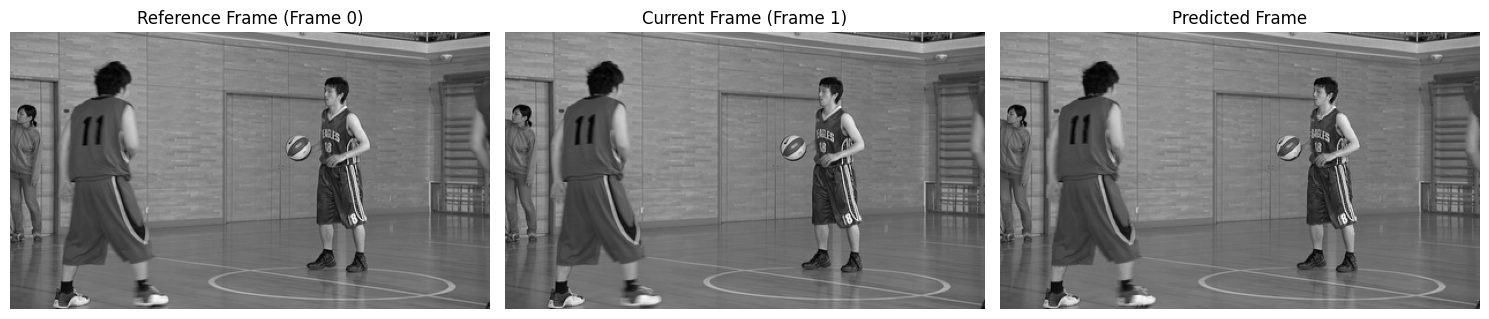

Prediction completed with blocksize=4, search_range=6
Prediction error range: [-93, 86]


In [3]:
# For each task use the function predict_frame() to perform the prediction and extend it if new parameters are required.
# Finally, executing the different scripts/functions for each task should create the respective results (e.g.  plots),
# which you may then include into the report.

# Task 1
# TODO: extend these code fragments
blocksize = 4
search_range = 6  #  modify this as appropriate
cur_frame, _, _ = read_frame(input_video, 1, width, height) # TODO: replace
ref_frame, _, _ = read_frame(input_video, 0, width, height)
pred = predict_frame(cur_frame, ref_frame, blocksize, search_range)

# Visualize results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(ref_frame, cmap='gray')
plt.title('Reference Frame (Frame 0)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cur_frame, cmap='gray')
plt.title('Current Frame (Frame 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred, cmap='gray')
plt.title('Predicted Frame')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compute prediction error (for subsequent tasks)
pred_error = cur_frame.astype(np.int32) - pred.astype(np.int32)
print(f"Prediction completed with blocksize={blocksize}, search_range={search_range}")
print(f"Prediction error range: [{pred_error.min()}, {pred_error.max()}]")


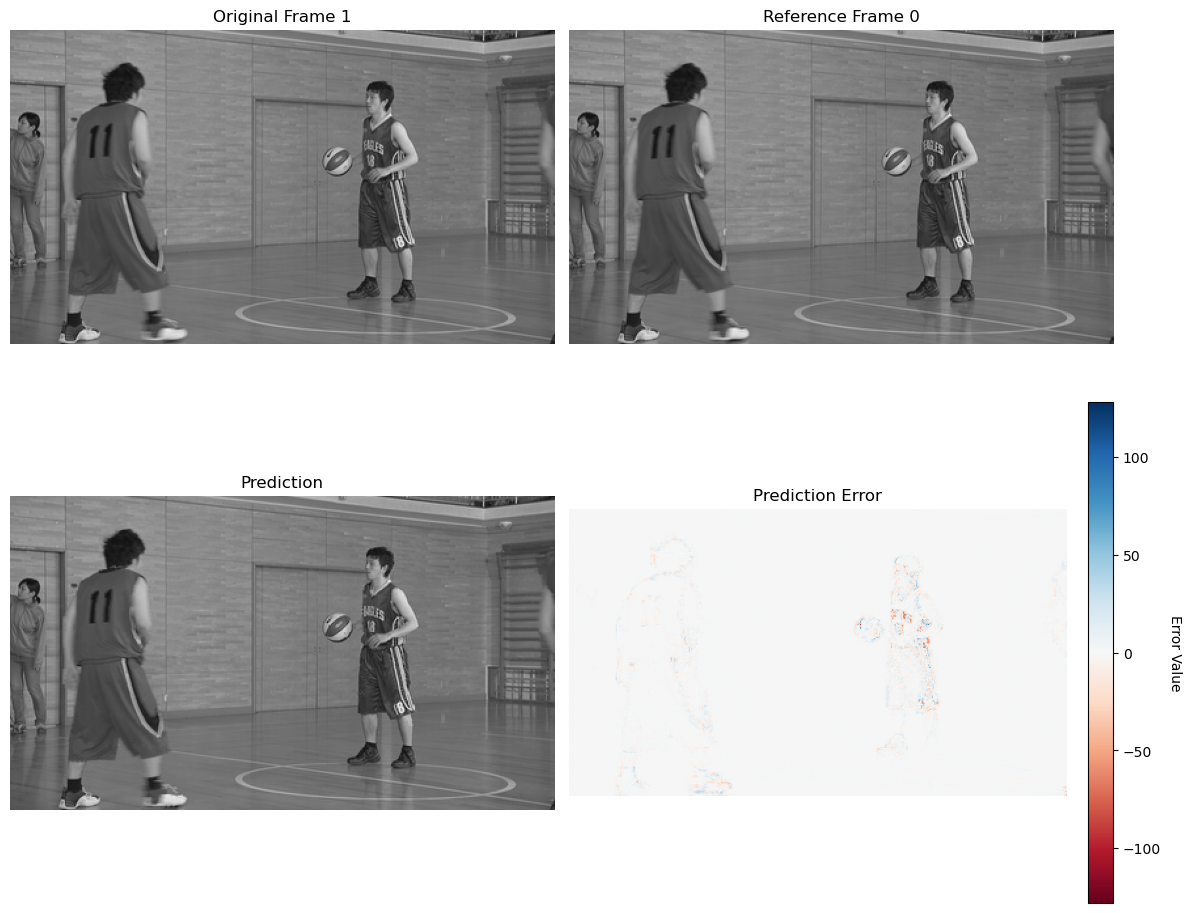

Visualized frame 1
Prediction error range: [-93, 86]
Prediction error mean: -0.02
Prediction error std: 3.62



In [5]:
## Task 2 (a)

# Choose one frame for visualization (frame 1)
chosen_frame_idx = 1

# Read chosen frame and its reference
chosen_cur_frame, _, _ = read_frame(input_video, chosen_frame_idx, width, height)
chosen_ref_frame, _, _ = read_frame(input_video, chosen_frame_idx - 1, width, height)

# Perform prediction
prediction = predict_frame(chosen_cur_frame, chosen_ref_frame, blocksize, search_range)

# Calculate prediction error
prediction_error = chosen_cur_frame.astype(np.int32) - prediction.astype(np.int32)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original current frame
axes[0, 0].imshow(chosen_cur_frame, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title(f'Original Frame {chosen_frame_idx}')
axes[0, 0].axis('off')

# Reference frame
axes[0, 1].imshow(chosen_ref_frame, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f'Reference Frame {chosen_frame_idx - 1}')
axes[0, 1].axis('off')

# Prediction
axes[1, 0].imshow(prediction, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Prediction')
axes[1, 0].axis('off')

# Prediction error (centered at 0, use diverging colormap)
im = axes[1, 1].imshow(prediction_error, cmap='RdBu', 
                       vmin=-128, vmax=128)
axes[1, 1].set_title('Prediction Error')
axes[1, 1].axis('off')

# Add colorbar for prediction error
cbar = plt.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar.set_label('Error Value', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('task2a_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Visualized frame {chosen_frame_idx}")
print(f"Prediction error range: [{prediction_error.min()}, {prediction_error.max()}]")
print(f"Prediction error mean: {prediction_error.mean():.2f}")
print(f"Prediction error std: {prediction_error.std():.2f}")
print()



Frame 1: MSE = 13.1231
Frame 2: MSE = 14.8759
Frame 3: MSE = 13.3365
Frame 4: MSE = 11.6326
Frame 5: MSE = 12.1317
Frame 6: MSE = 11.8484
Frame 7: MSE = 12.7410
Frame 8: MSE = 12.1338
Frame 9: MSE = 11.2258
------------------------------------------------------------
Average MSE over all frames: 12.5610



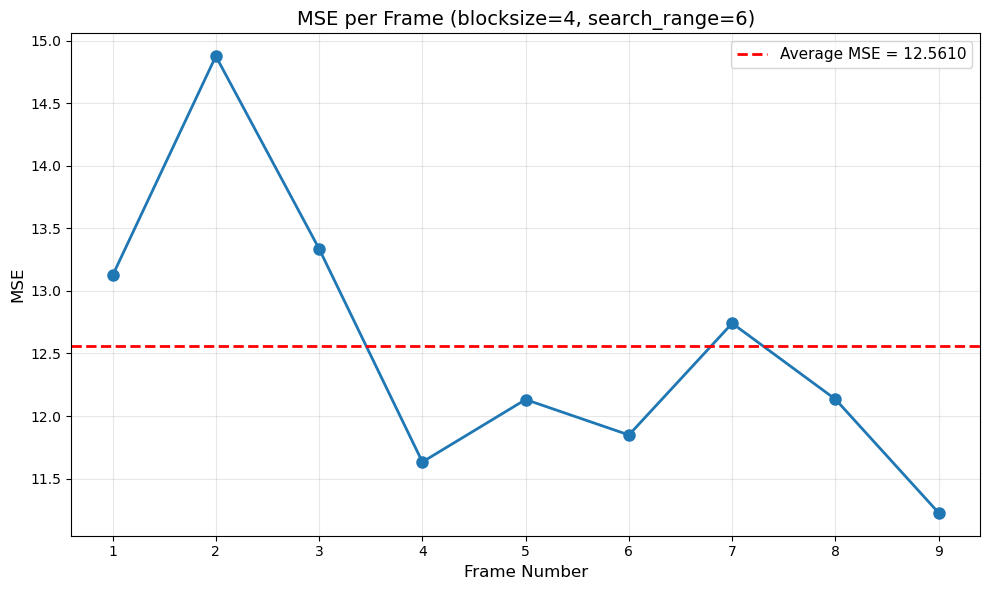

In [6]:
## Task 2 (b)

mse_values = []

# Loop through all frames (starting from frame 1, using frame 0 as reference)
for frame_idx in range(1, num_frames):
    # Read current frame
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    
    # Read reference frame (previous frame)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    # Perform prediction
    predicted = predict_frame(current, reference, blocksize, search_range)
    
    # Compute MSE for this frame
    mse = compute_mse(current, predicted)
    mse_values.append(mse)
    
    print(f"Frame {frame_idx}: MSE = {mse:.4f}")

# Calculate average MSE over all frames
average_mse = np.mean(mse_values)

print("-" * 60)
print(f"Average MSE over all frames: {average_mse:.4f}")
print()

# Plot MSE values for each frame
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_frames), mse_values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Frame Number', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title(f'MSE per Frame (blocksize={blocksize}, search_range={search_range})', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=average_mse, color='r', linestyle='--', linewidth=2, 
            label=f'Average MSE = {average_mse:.4f}')
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('task2b_mse_plot.png', dpi=150, bbox_inches='tight')
plt.show()


Analyzing video: BasketballPass
Search range ± 1: Average MSE =  58.1999
Search range ± 2: Average MSE =  26.7607
Search range ± 3: Average MSE =  17.3952
Search range ± 4: Average MSE =  14.8051
Search range ± 5: Average MSE =  13.4391
Search range ± 6: Average MSE =  12.5610
Search range ± 7: Average MSE =  12.0907
Search range ± 8: Average MSE =  11.8120
Search range ± 9: Average MSE =  11.6849
Search range ±10: Average MSE =  11.5822
Search range ±11: Average MSE =  11.4950
Search range ±12: Average MSE =  11.4297
Search range ±13: Average MSE =  11.3750
Search range ±14: Average MSE =  11.3303
Search range ±15: Average MSE =  11.2819
Search range ±16: Average MSE =  11.2405
Search range ±17: Average MSE =  11.2155
Search range ±18: Average MSE =  11.1897
Search range ±19: Average MSE =  11.1721
Search range ±20: Average MSE =  11.1405
Search range ±21: Average MSE =  11.1115
Search range ±22: Average MSE =  11.0918
Search range ±23: Average MSE =  11.0676
Search range ±24: Averag

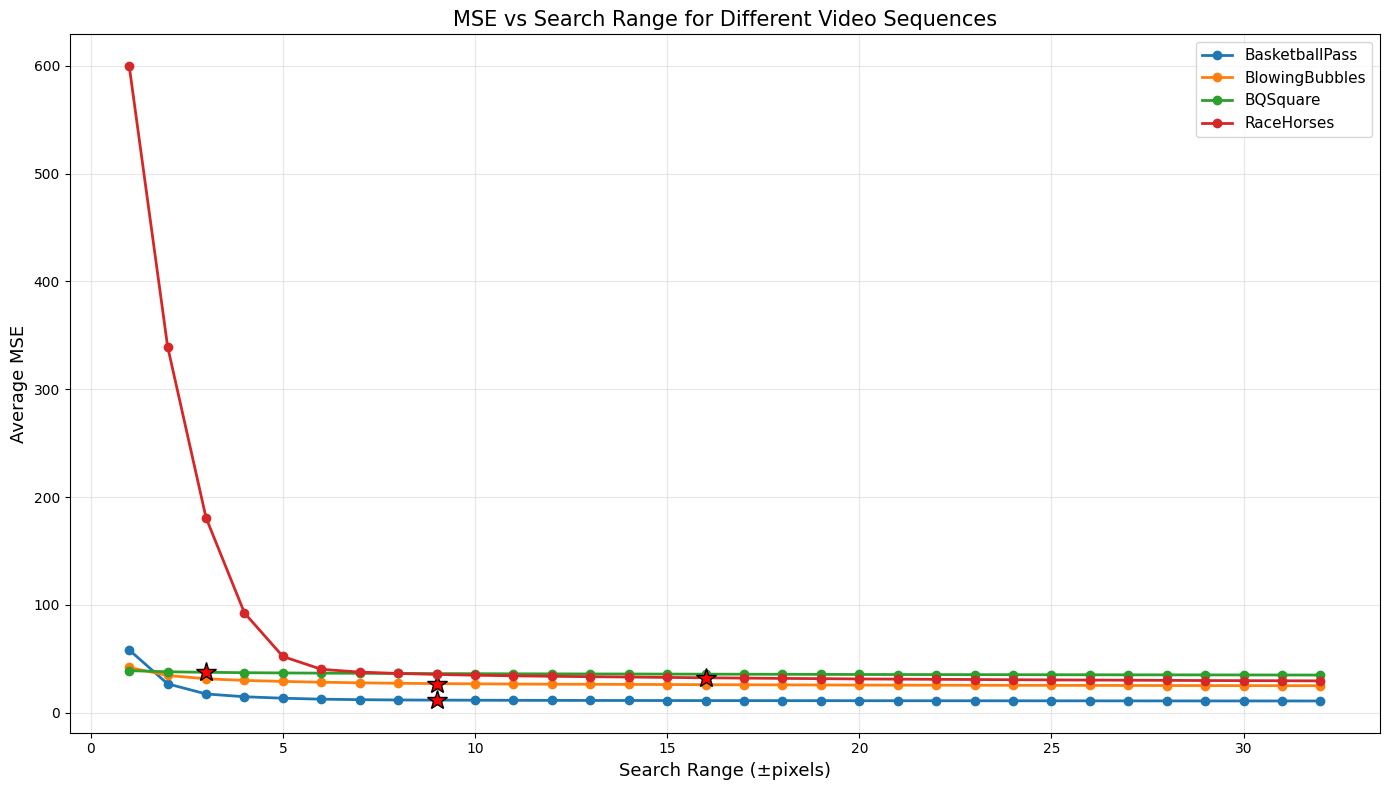

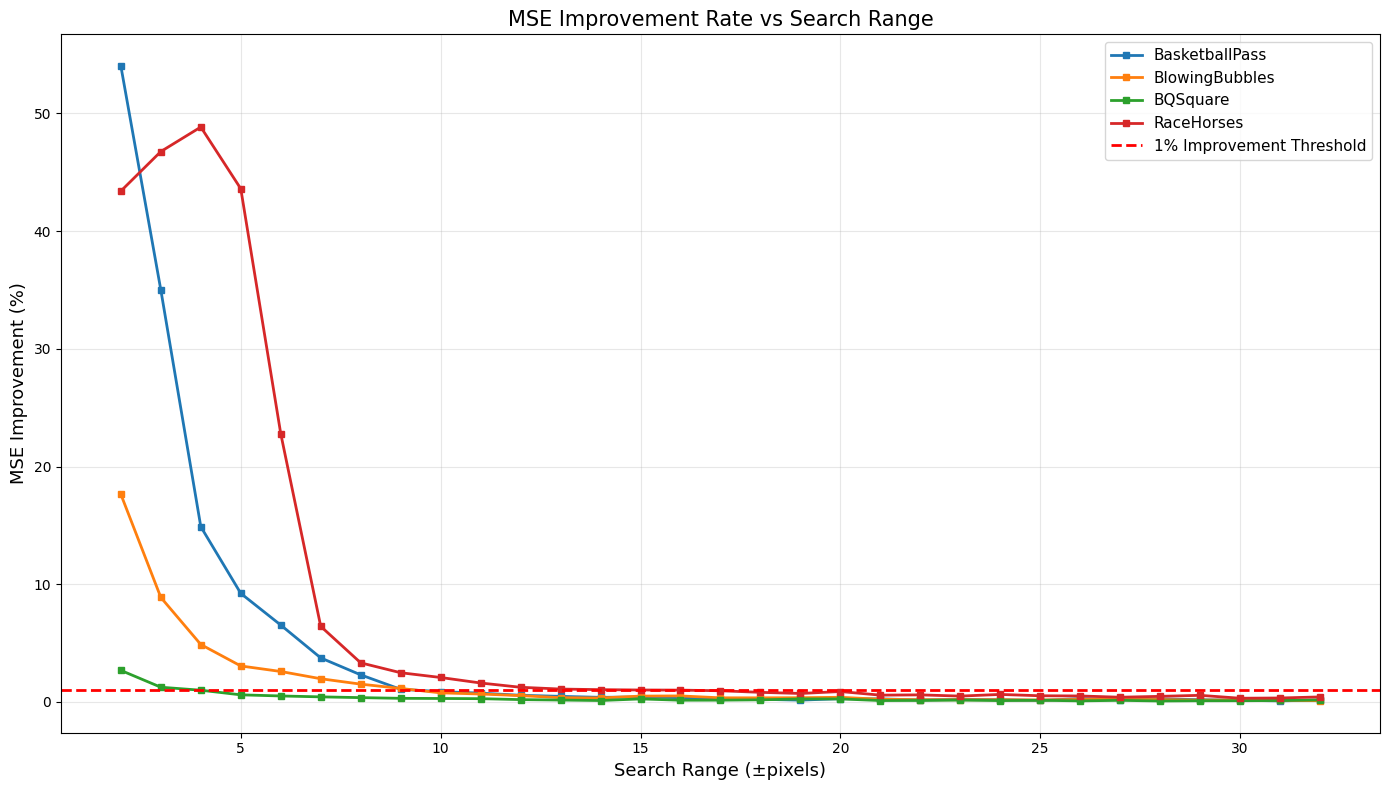

Summary: Necessary Search Range for Each Sequence
Video                Necessary Range      MSE at Range    MSE at Max     
----------------------------------------------------------------------
BasketballPass       ±9                   11.6849         10.8820        
BlowingBubbles       ±9                   26.9855         25.0621        
BQSquare             ±3                   37.4861         34.9193        
RaceHorses           ±16                  32.3951         29.5133        
Maximum necessary search range across all sequences: ±16
This value will be used for subsequent tasks (Task 4-7)


In [4]:
## Task 3

def analyze_search_range(video_file, video_name, num_frames, width, height, blocksize, max_search_range):
    """
    Analyze the necessary search range for a video sequence
    
    :param video_file: path to video file
    :param video_name: name of video for display
    :param num_frames: number of frames in video
    :param width: frame width
    :param height: frame height
    :param blocksize: block size for motion estimation
    :param max_search_range: maximum search range to test
    :return: dictionary with results
    """
    print(f"\nAnalyzing video: {video_name}")
    
    # Test different search ranges
    search_ranges = list(range(1, max_search_range + 1))
    mse_per_range = []
    
    for sr in search_ranges:
        mse_values = []
        
        # Compute MSE for all frames with this search range
        for frame_idx in range(1, num_frames):
            current, _, _ = read_frame(video_file, frame_idx, width, height)
            reference, _, _ = read_frame(video_file, frame_idx - 1, width, height)
            
            predicted = predict_frame(current, reference, blocksize, sr)
            mse = compute_mse(current, predicted)
            mse_values.append(mse)
        
        avg_mse = np.mean(mse_values)
        mse_per_range.append(avg_mse)
        
        print(f"Search range ±{sr:2d}: Average MSE = {avg_mse:8.4f}")
    
    # Find saturation point (where MSE improvement becomes negligible)
    # Define threshold: less than 1% improvement
    mse_improvements = []
    for i in range(1, len(mse_per_range)):
        improvement = (mse_per_range[i-1] - mse_per_range[i]) / mse_per_range[i-1] * 100
        mse_improvements.append(improvement)
    
    # Find first point where improvement < 1%
    necessary_range = max_search_range
    for i, improvement in enumerate(mse_improvements):
        if improvement < 1.0:  # Less than 1% improvement
            necessary_range = search_ranges[i]
            break
    
    print(f"\nRecommended search range for {video_name}: ±{necessary_range}")
    print(f"MSE at this range: {mse_per_range[necessary_range-1]:.4f}")
    
    return {
        'name': video_name,
        'search_ranges': search_ranges,
        'mse_values': mse_per_range,
        'necessary_range': necessary_range,
        'mse_improvements': mse_improvements
    }

# Test sequences
test_videos = [
    ('sequences/BasketballPass_416x240_50_10frames.yuv', 'BasketballPass'),
    ('sequences/BlowingBubbles_416x240_50_10frames.yuv', 'BlowingBubbles'),
    ('sequences/BQSquare_416x240_60_10frames.yuv', 'BQSquare'),
    ('sequences/RaceHorses_416x240_30_10frames.yuv', 'RaceHorses'),
]

# Parameters
width = 416
height = 240
num_frames = 10
blocksize = 4
max_search_range = 32  # Test up to ±32 pixels

# Analyze all sequences
results = []
for video_file, video_name in test_videos:
    result = analyze_search_range(video_file, video_name, num_frames, 
                                   width, height, blocksize, max_search_range)
    results.append(result)

# Visualization: MSE vs Search Range for all sequences
print("Visualization: MSE vs Search Range")

plt.figure(figsize=(14, 8))

# Plot MSE curves for all sequences
for result in results:
    plt.plot(result['search_ranges'], result['mse_values'], 
             marker='o', linewidth=2, markersize=6, label=result['name'])
    
    # Mark the necessary range point
    necessary_idx = result['necessary_range'] - 1
    plt.plot(result['necessary_range'], result['mse_values'][necessary_idx], 
             'r*', markersize=15, markeredgecolor='black', markeredgewidth=1)

plt.xlabel('Search Range (±pixels)', fontsize=13)
plt.ylabel('Average MSE', fontsize=13)
plt.title('MSE vs Search Range for Different Video Sequences', fontsize=15)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task3_mse_vs_search_range.png', dpi=150, bbox_inches='tight')
plt.show()


# Visualization: MSE Improvement Rate
plt.figure(figsize=(14, 8))

for result in results:
    plt.plot(result['search_ranges'][1:], result['mse_improvements'], 
             marker='s', linewidth=2, markersize=5, label=result['name'])

plt.axhline(y=1.0, color='r', linestyle='--', linewidth=2, 
            label='1% Improvement Threshold')
plt.xlabel('Search Range (±pixels)', fontsize=13)
plt.ylabel('MSE Improvement (%)', fontsize=13)
plt.title('MSE Improvement Rate vs Search Range', fontsize=15)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task3_mse_improvement.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary and Analysis
print("Summary: Necessary Search Range for Each Sequence")

summary_table = []
for result in results:
    summary_table.append({
        'Video': result['name'],
        'Necessary_Range': f"±{result['necessary_range']}",
        'MSE_at_Range': f"{result['mse_values'][result['necessary_range']-1]:.4f}",
        'MSE_at_Max': f"{result['mse_values'][-1]:.4f}"
    })

# Print summary table
print(f"{'Video':<20} {'Necessary Range':<20} {'MSE at Range':<15} {'MSE at Max':<15}")
print("-" * 70)
for row in summary_table:
    print(f"{row['Video']:<20} {row['Necessary_Range']:<20} "
          f"{row['MSE_at_Range']:<15} {row['MSE_at_Max']:<15}")

# Determine maximum necessary range across all sequences
max_necessary_range = max([r['necessary_range'] for r in results])
print(f"Maximum necessary search range across all sequences: ±{max_necessary_range}")
print(f"This value will be used for subsequent tasks (Task 4-7)")


Test configuration:
  Block size: 4x4
  Search range: ±16
  Video: sequences/BasketballPass_416x240_50_10frames.yuv
  Frames to process: 9

------------------------------------------------------------
Testing SSD (Sum of Squared Differences)...
------------------------------------------------------------
SSD processing time: 214.1647 seconds
------------------------------------------------------------
Testing SAD (Sum of Absolute Differences)...
------------------------------------------------------------
SAD processing time: 212.4639 seconds
Performance Comparison Results
SSD total time:  214.1647 seconds
SAD total time:  212.4639 seconds
Time saved:      1.7009 seconds
Time saved:      0.79%

SAD is 1.01x faster than SSD
Prediction Quality Comparison

Frame 5 prediction quality:
  MSE with SSD: 10.6968
  MSE with SAD: 11.1938
  Difference:   0.4969


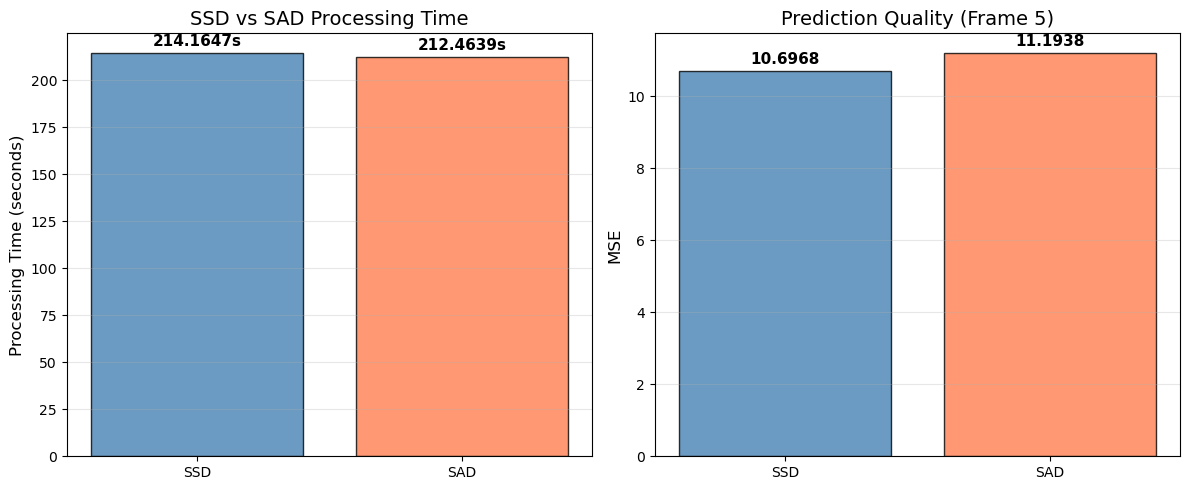

In [8]:
## Task 4

# Use maximum search range from Task 3
search_range = 16  # From Task 3 results
blocksize = 4

# Test parameters
num_frames = 10
width = 416
height = 240
input_video = 'sequences/BasketballPass_416x240_50_10frames.yuv'

print(f"\nTest configuration:")
print(f"  Block size: {blocksize}x{blocksize}")
print(f"  Search range: ±{search_range}")
print(f"  Video: {input_video}")
print(f"  Frames to process: {num_frames - 1}")
print()

# Time measurement for SSD
print("-" * 60)
print("Testing SSD (Sum of Squared Differences)...")
print("-" * 60)

start_time_ssd = time.time()

for frame_idx in range(1, num_frames):
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    # Use SSD (default)
    _ = predict_frame(current, reference, blocksize, search_range, distance_metric='ssd')

end_time_ssd = time.time()
time_ssd = end_time_ssd - start_time_ssd

print(f"SSD processing time: {time_ssd:.4f} seconds")

# Time measurement for SAD
print("-" * 60)
print("Testing SAD (Sum of Absolute Differences)...")
print("-" * 60)

start_time_sad = time.time()

for frame_idx in range(1, num_frames):
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    # Use SAD
    _ = predict_frame(current, reference, blocksize, search_range, distance_metric='sad')

end_time_sad = time.time()
time_sad = end_time_sad - start_time_sad

print(f"SAD processing time: {time_sad:.4f} seconds")

# Calculate time savings
print("Performance Comparison Results")

time_saved = time_ssd - time_sad
time_saved_percent = (time_saved / time_ssd) * 100

print(f"SSD total time:  {time_ssd:.4f} seconds")
print(f"SAD total time:  {time_sad:.4f} seconds")
print(f"Time saved:      {time_saved:.4f} seconds")
print(f"Time saved:      {time_saved_percent:.2f}%")
print()

if time_saved > 0:
    speedup = time_ssd / time_sad
    print(f"SAD is {speedup:.2f}x faster than SSD")
else:
    print(f"Note: SAD was slower (possibly due to measurement noise)")

# Verify prediction quality (should be similar)
print("Prediction Quality Comparison")

# Test on one frame
test_frame_idx = 5
current, _, _ = read_frame(input_video, test_frame_idx, width, height)
reference, _, _ = read_frame(input_video, test_frame_idx - 1, width, height)

# Predict with SSD
pred_ssd = predict_frame(current, reference, blocksize, search_range, distance_metric='ssd')
mse_ssd = compute_mse(current, pred_ssd)

# Predict with SAD
pred_sad = predict_frame(current, reference, blocksize, search_range, distance_metric='sad')
mse_sad = compute_mse(current, pred_sad)

print(f"\nFrame {test_frame_idx} prediction quality:")
print(f"  MSE with SSD: {mse_ssd:.4f}")
print(f"  MSE with SAD: {mse_sad:.4f}")
print(f"  Difference:   {abs(mse_ssd - mse_sad):.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for time comparison
metrics = ['SSD', 'SAD']
times = [time_ssd, time_sad]
colors = ['steelblue', 'coral']

axes[0].bar(metrics, times, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Processing Time (seconds)', fontsize=12)
axes[0].set_title('SSD vs SAD Processing Time', fontsize=14)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (metric, t) in enumerate(zip(metrics, times)):
    axes[0].text(i, t + 0.01 * max(times), f'{t:.4f}s', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Bar chart for MSE comparison
mse_values = [mse_ssd, mse_sad]

axes[1].bar(metrics, mse_values, color=colors, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('MSE', fontsize=12)
axes[1].set_title(f'Prediction Quality (Frame {test_frame_idx})', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, (metric, mse) in enumerate(zip(metrics, mse_values)):
    axes[1].text(i, mse + 0.01 * max(mse_values), f'{mse:.4f}', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('task4_ssd_vs_sad.png', dpi=150, bbox_inches='tight')
plt.show()


Test configuration:
  Video: sequences/BasketballPass_416x240_50_10frames.yuv
  Resolution: 416x240
  Search range: ±16
  Distance metric: SSD
  Block sizes to test: [4, 8, 16]
  Frames to process: 9

------------------------------------------------------------
Testing block size: 4x4
------------------------------------------------------------
Number of blocks: 6240 (104 x 60)
Average MSE: 11.2405
Processing time: 213.3057 seconds
Time per frame: 23.7006 seconds

------------------------------------------------------------
Testing block size: 8x8
------------------------------------------------------------
Number of blocks: 1560 (52 x 30)
Average MSE: 18.0713
Processing time: 53.3671 seconds
Time per frame: 5.9297 seconds

------------------------------------------------------------
Testing block size: 16x16
------------------------------------------------------------
Number of blocks: 390 (26 x 15)
Average MSE: 26.2258
Processing time: 14.5731 seconds
Time per frame: 1.6192 seconds


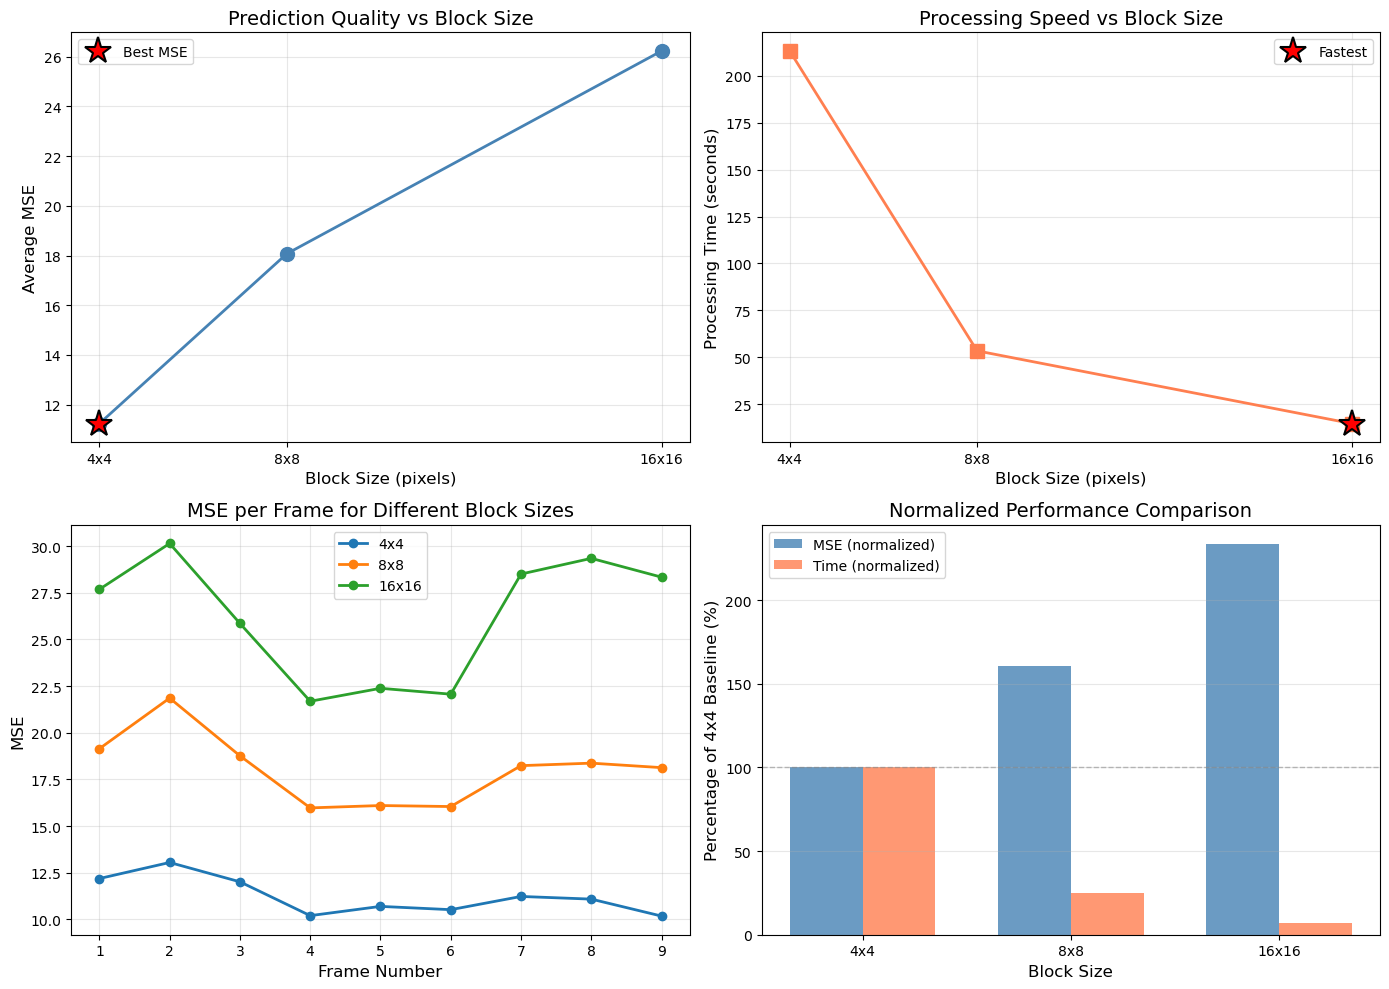

In [9]:
## Task 5

# Parameters from previous tasks
search_range = 16  # From Task 3
distance_metric = 'ssd'

# Video configuration
input_video = 'sequences/BasketballPass_416x240_50_10frames.yuv'
num_frames = 10
width = 416
height = 240

# Test different block sizes
# Note: Image dimensions (416x240) must be divisible by block size
# 416 = 2^5 × 13, 240 = 2^4 × 3 × 5
# Common divisors: 1, 2, 4, 8, 16
block_sizes = [4, 8, 16]  # Valid block sizes for 416x240

print(f"\nTest configuration:")
print(f"  Video: {input_video}")
print(f"  Resolution: {width}x{height}")
print(f"  Search range: ±{search_range}")
print(f"  Distance metric: {distance_metric.upper()}")
print(f"  Block sizes to test: {block_sizes}")
print(f"  Frames to process: {num_frames - 1}")
print()

# Storage for results
results = {
    'block_sizes': [],
    'avg_mse': [],
    'processing_time': [],
    'mse_per_frame': []
}

# Test each block size
for blocksize in block_sizes:
    print("-" * 60)
    print(f"Testing block size: {blocksize}x{blocksize}")
    print("-" * 60)
    
    # Verify divisibility
    if width % blocksize != 0 or height % blocksize != 0:
        print(f"Warning: Image dimensions ({width}x{height}) not divisible by {blocksize}")
        print(f"Skipping this block size...")
        continue
    
    num_blocks = (width // blocksize) * (height // blocksize)
    print(f"Number of blocks: {num_blocks} ({width//blocksize} x {height//blocksize})")
    
    # Measure processing time
    start_time = time.time()
    
    mse_values = []
    
    for frame_idx in range(1, num_frames):
        current, _, _ = read_frame(input_video, frame_idx, width, height)
        reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
        
        # Perform prediction
        predicted = predict_frame(current, reference, blocksize, search_range, distance_metric)
        
        # Compute MSE
        mse = compute_mse(current, predicted)
        mse_values.append(mse)
    
    end_time = time.time()
    processing_time = end_time - start_time
    
    # Calculate average MSE
    avg_mse = np.mean(mse_values)
    
    # Store results
    results['block_sizes'].append(blocksize)
    results['avg_mse'].append(avg_mse)
    results['processing_time'].append(processing_time)
    results['mse_per_frame'].append(mse_values)
    
    print(f"Average MSE: {avg_mse:.4f}")
    print(f"Processing time: {processing_time:.4f} seconds")
    print(f"Time per frame: {processing_time/(num_frames-1):.4f} seconds")
    print()

# Summary
print("Summary: Block Size Impact")

print(f"\n{'Block Size':<15} {'Avg MSE':<15} {'Time (s)':<15} {'Time/Frame (s)':<15}")
print("-" * 60)
for bs, mse, t in zip(results['block_sizes'], results['avg_mse'], results['processing_time']):
    time_per_frame = t / (num_frames - 1)
    print(f"{bs}x{bs:<12} {mse:<15.4f} {t:<15.4f} {time_per_frame:<15.4f}")

# Analysis

# Find best MSE
best_mse_idx = np.argmin(results['avg_mse'])
best_mse_blocksize = results['block_sizes'][best_mse_idx]
best_mse_value = results['avg_mse'][best_mse_idx]

# Find fastest
fastest_idx = np.argmin(results['processing_time'])
fastest_blocksize = results['block_sizes'][fastest_idx]
fastest_time = results['processing_time'][fastest_idx]

print(f"\nBest prediction quality:")
print(f"  Block size: {best_mse_blocksize}x{best_mse_blocksize}")
print(f"  Average MSE: {best_mse_value:.4f}")

print(f"\nFastest processing:")
print(f"  Block size: {fastest_blocksize}x{fastest_blocksize}")
print(f"  Processing time: {fastest_time:.4f} seconds")

# Calculate relative performance
print(f"\nRelative performance (compared to 4x4 baseline):")
baseline_mse = results['avg_mse'][0]
baseline_time = results['processing_time'][0]

for bs, mse, t in zip(results['block_sizes'], results['avg_mse'], results['processing_time']):
    mse_change = ((mse - baseline_mse) / baseline_mse) * 100
    time_change = ((t - baseline_time) / baseline_time) * 100
    
    print(f"  {bs}x{bs}: MSE {mse_change:+.2f}%, Time {time_change:+.2f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: MSE vs Block Size
axes[0, 0].plot(results['block_sizes'], results['avg_mse'], 
                marker='o', linewidth=2, markersize=10, color='steelblue')
axes[0, 0].set_xlabel('Block Size (pixels)', fontsize=12)
axes[0, 0].set_ylabel('Average MSE', fontsize=12)
axes[0, 0].set_title('Prediction Quality vs Block Size', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(results['block_sizes'])
axes[0, 0].set_xticklabels([f'{bs}x{bs}' for bs in results['block_sizes']])

# Mark best MSE
axes[0, 0].plot(best_mse_blocksize, best_mse_value, 
                'r*', markersize=20, markeredgecolor='black', markeredgewidth=1.5,
                label='Best MSE')
axes[0, 0].legend()

# Plot 2: Processing Time vs Block Size
axes[0, 1].plot(results['block_sizes'], results['processing_time'], 
                marker='s', linewidth=2, markersize=10, color='coral')
axes[0, 1].set_xlabel('Block Size (pixels)', fontsize=12)
axes[0, 1].set_ylabel('Processing Time (seconds)', fontsize=12)
axes[0, 1].set_title('Processing Speed vs Block Size', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(results['block_sizes'])
axes[0, 1].set_xticklabels([f'{bs}x{bs}' for bs in results['block_sizes']])

# Mark fastest
axes[0, 1].plot(fastest_blocksize, fastest_time, 
                'r*', markersize=20, markeredgecolor='black', markeredgewidth=1.5,
                label='Fastest')
axes[0, 1].legend()

# Plot 3: MSE per Frame for each block size
for i, (bs, mse_list) in enumerate(zip(results['block_sizes'], results['mse_per_frame'])):
    axes[1, 0].plot(range(1, num_frames), mse_list, 
                    marker='o', linewidth=2, markersize=6, label=f'{bs}x{bs}')

axes[1, 0].set_xlabel('Frame Number', fontsize=12)
axes[1, 0].set_ylabel('MSE', fontsize=12)
axes[1, 0].set_title('MSE per Frame for Different Block Sizes', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Plot 4: Bar chart comparison
x_pos = np.arange(len(results['block_sizes']))
width_bar = 0.35

# Normalize values for comparison
norm_mse = np.array(results['avg_mse']) / results['avg_mse'][0] * 100
norm_time = np.array(results['processing_time']) / results['processing_time'][0] * 100

axes[1, 1].bar(x_pos - width_bar/2, norm_mse, width_bar, 
               label='MSE (normalized)', color='steelblue', alpha=0.8)
axes[1, 1].bar(x_pos + width_bar/2, norm_time, width_bar, 
               label='Time (normalized)', color='coral', alpha=0.8)

axes[1, 1].set_xlabel('Block Size', fontsize=12)
axes[1, 1].set_ylabel('Percentage of 4x4 Baseline (%)', fontsize=12)
axes[1, 1].set_title('Normalized Performance Comparison', fontsize=14)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'{bs}x{bs}' for bs in results['block_sizes']])
axes[1, 1].axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('task5_block_size_analysis.png', dpi=150, bbox_inches='tight')
plt.show()


Test configuration:
  Video: sequences/BasketballPass_416x240_50_10frames.yuv
  Block size: 4x4
  Search range: ±16
  Distance metric: SSD
  Frames to process: 9

Theoretical Search Positions Analysis
Number of blocks: 6240
Full search positions per block: 1089
Expected three-step positions per block: ~25-33 (varies with boundaries)

------------------------------------------------------------
Testing Full Search...
------------------------------------------------------------
Full search processing time: 213.1246 seconds
Average MSE: 11.2405
Actual search positions (per frame): 6,795,360

------------------------------------------------------------
Testing Three Step Search...
------------------------------------------------------------
Three-step search processing time: 7.0763 seconds
Average MSE: 29.2473
Average search positions (per frame): 201,075

Performance Comparison: Full Search vs Three Step Search

Metric                         Full Search          Three-Step           Cha

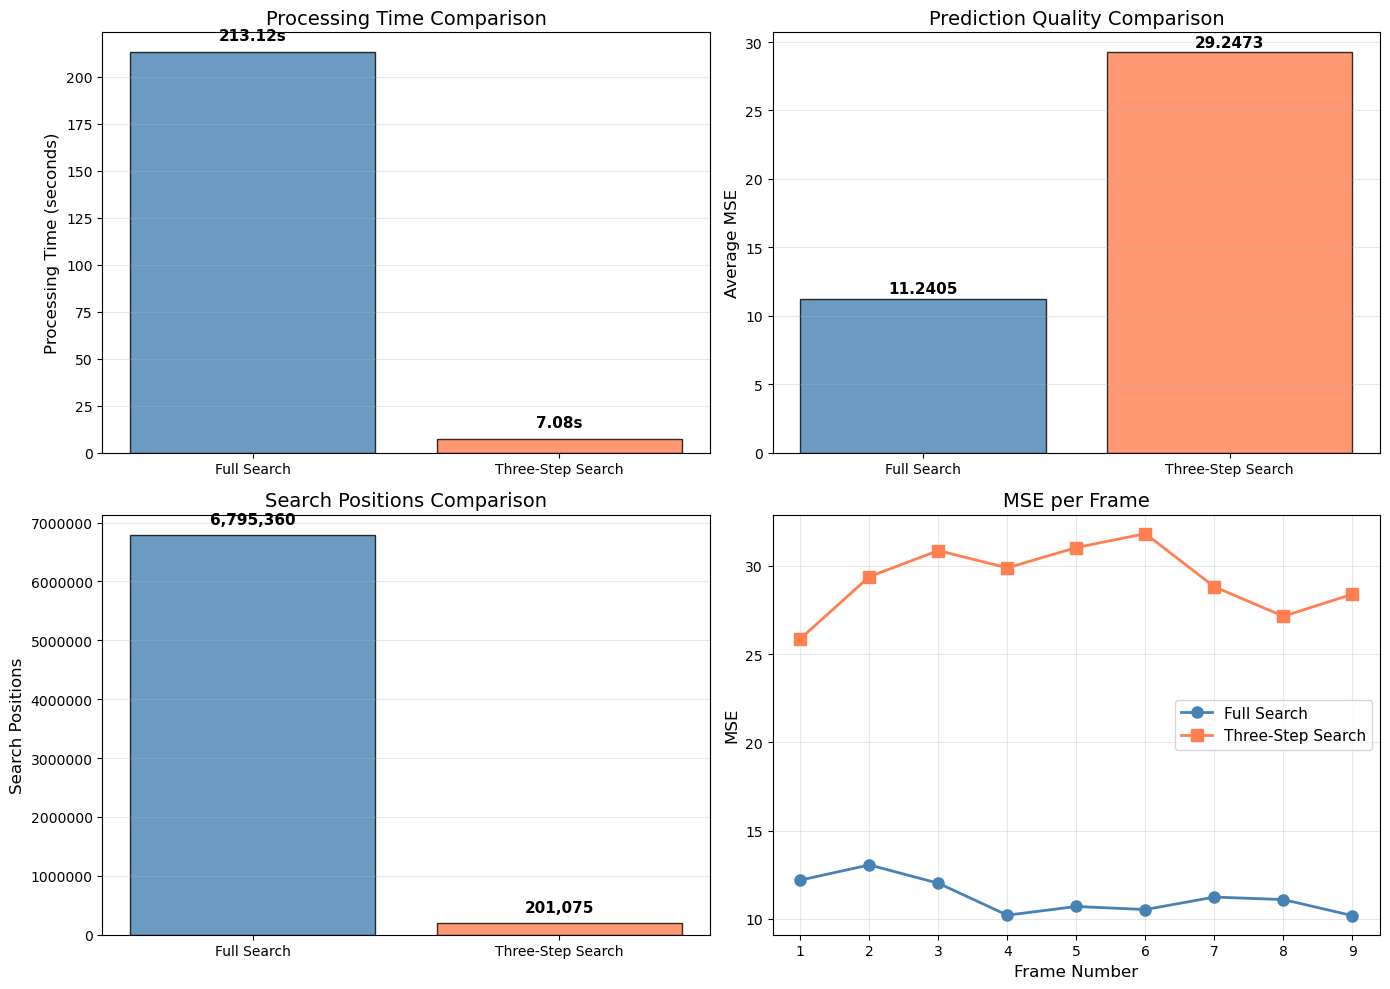

In [10]:
## Task 6

# Parameters from previous tasks
blocksize = 4
search_range = 16
distance_metric = 'ssd'

# Video configuration
input_video = 'sequences/BasketballPass_416x240_50_10frames.yuv'
num_frames = 10
width = 416
height = 240

print(f"\nTest configuration:")
print(f"  Video: {input_video}")
print(f"  Block size: {blocksize}x{blocksize}")
print(f"  Search range: ±{search_range}")
print(f"  Distance metric: {distance_metric.upper()}")
print(f"  Frames to process: {num_frames - 1}")
print()

# Calculate theoretical number of search positions
num_blocks = (width // blocksize) * (height // blocksize)

# Full search: (2*search_range + 1)^2 positions per block
full_search_positions_per_block = (2 * search_range + 1) ** 2
total_full_search_positions = num_blocks * full_search_positions_per_block

# Three step search: 1 + 8*log2(search_range) positions per block (approximately)
# For search_range = 16:
# Step 1: center + 8 neighbors at step=8 → 9 positions
# Step 2: center + 8 neighbors at step=4 → 8 positions (center already counted)
# Step 3: center + 8 neighbors at step=2 → 8 positions
# Step 4: center + 8 neighbors at step=1 → 8 positions
# Total ≈ 1 + 8 + 8 + 8 + 8 = 33 positions (but actual may vary due to boundaries)

print("Theoretical Search Positions Analysis")
print(f"Number of blocks: {num_blocks}")
print(f"Full search positions per block: {full_search_positions_per_block}")
print(f"Expected three-step positions per block: ~25-33 (varies with boundaries)")
print()

# Test 1: Full Search
print("-" * 60)
print("Testing Full Search...")
print("-" * 60)

start_time_full = time.time()
mse_values_full = []
actual_full_search_positions = 0

for frame_idx in range(1, num_frames):
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    predicted = predict_frame(current, reference, blocksize, search_range, distance_metric)
    mse = compute_mse(current, predicted)
    mse_values_full.append(mse)
    
    # Count search positions (for one frame)
    if frame_idx == 1:
        actual_full_search_positions = num_blocks * full_search_positions_per_block

end_time_full = time.time()
time_full = end_time_full - start_time_full
avg_mse_full = np.mean(mse_values_full)

print(f"Full search processing time: {time_full:.4f} seconds")
print(f"Average MSE: {avg_mse_full:.4f}")
print(f"Actual search positions (per frame): {actual_full_search_positions:,}")
print()

# Test 2: Three Step Search

print("-" * 60)
print("Testing Three Step Search...")
print("-" * 60)

start_time_tss = time.time()
mse_values_tss = []
total_tss_positions = 0

for frame_idx in range(1, num_frames):
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    predicted, search_positions = predict_frame_three_step(current, reference, 
                                                            blocksize, search_range, 
                                                            distance_metric)
    mse = compute_mse(current, predicted)
    mse_values_tss.append(mse)
    total_tss_positions += search_positions

end_time_tss = time.time()
time_tss = end_time_tss - start_time_tss
avg_mse_tss = np.mean(mse_values_tss)
avg_tss_positions = total_tss_positions // (num_frames - 1)

print(f"Three-step search processing time: {time_tss:.4f} seconds")
print(f"Average MSE: {avg_mse_tss:.4f}")
print(f"Average search positions (per frame): {avg_tss_positions:,}")
print()

# Performance Comparison

print("Performance Comparison: Full Search vs Three Step Search")

time_saved = time_full - time_tss
time_saved_percent = (time_saved / time_full) * 100
speedup = time_full / time_tss

mse_degradation = avg_mse_tss - avg_mse_full
mse_degradation_percent = (mse_degradation / avg_mse_full) * 100

positions_reduction = actual_full_search_positions - avg_tss_positions
positions_reduction_percent = (positions_reduction / actual_full_search_positions) * 100

print(f"\n{'Metric':<30} {'Full Search':<20} {'Three-Step':<20} {'Change':<20}")
print("-" * 90)
print(f"{'Processing time (s)':<30} {time_full:<20.4f} {time_tss:<20.4f} {time_saved_percent:+.2f}%")
print(f"{'Average MSE':<30} {avg_mse_full:<20.4f} {avg_mse_tss:<20.4f} {mse_degradation_percent:+.2f}%")
print(f"{'Search positions':<30} {actual_full_search_positions:<20,} {avg_tss_positions:<20,} {-positions_reduction_percent:.2f}%")

print(f"\n{'Summary':<50}")
print("-" * 90)
print(f"Time saved: {time_saved:.4f} seconds ({time_saved_percent:.2f}%)")
print(f"Speedup factor: {speedup:.2f}x")
print(f"MSE degradation: {mse_degradation:.4f} ({mse_degradation_percent:.2f}%)")
print(f"Search positions reduced by: {positions_reduction_percent:.2f}%")

# Verify theoretical vs actual
print(f"\n{'Theoretical vs Actual Search Positions':<50}")
print("-" * 90)
print(f"Theoretical full search positions: {total_full_search_positions:,}")
print(f"Actual full search positions: {actual_full_search_positions:,}")
print(f"Average three-step positions per block: {avg_tss_positions / num_blocks:.1f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Processing Time Comparison
methods = ['Full Search', 'Three-Step Search']
times = [time_full, time_tss]
colors = ['steelblue', 'coral']

axes[0, 0].bar(methods, times, color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('Processing Time (seconds)', fontsize=12)
axes[0, 0].set_title('Processing Time Comparison', fontsize=14)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (method, t) in enumerate(zip(methods, times)):
    axes[0, 0].text(i, t + 5, f'{t:.2f}s', ha='center', va='bottom', 
                    fontsize=11, fontweight='bold')

# Plot 2: MSE Comparison
mse_values = [avg_mse_full, avg_mse_tss]

axes[0, 1].bar(methods, mse_values, color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('Average MSE', fontsize=12)
axes[0, 1].set_title('Prediction Quality Comparison', fontsize=14)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, (method, mse) in enumerate(zip(methods, mse_values)):
    axes[0, 1].text(i, mse + 0.2, f'{mse:.4f}', ha='center', va='bottom', 
                    fontsize=11, fontweight='bold')

# Plot 3: Search Positions Comparison
positions = [actual_full_search_positions, avg_tss_positions]

axes[1, 0].bar(methods, positions, color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('Search Positions', fontsize=12)
axes[1, 0].set_title('Search Positions Comparison', fontsize=14)
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].ticklabel_format(style='plain', axis='y')

for i, (method, pos) in enumerate(zip(methods, positions)):
    axes[1, 0].text(i, pos + positions[0]*0.02, f'{pos:,}', ha='center', 
                    va='bottom', fontsize=11, fontweight='bold')

# Plot 4: MSE per Frame
frames = range(1, num_frames)
axes[1, 1].plot(frames, mse_values_full, marker='o', linewidth=2, 
                markersize=8, label='Full Search', color='steelblue')
axes[1, 1].plot(frames, mse_values_tss, marker='s', linewidth=2, 
                markersize=8, label='Three-Step Search', color='coral')
axes[1, 1].set_xlabel('Frame Number', fontsize=12)
axes[1, 1].set_ylabel('MSE', fontsize=12)
axes[1, 1].set_title('MSE per Frame', fontsize=14)
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task6_three_step_search.png', dpi=150, bbox_inches='tight')
plt.show()


Test configuration:
  Video: sequences/BasketballPass_416x240_50_10frames.yuv
  Block size: 4x4
  Search range: ±16
  Distance metric: SSD
  Search method: Three-Step Search
  Frames to process: 9

------------------------------------------------------------
Testing Integer-Pixel Accuracy (Three-Step Search)...
------------------------------------------------------------
Integer-pixel processing time: 7.2965 seconds
Average MSE: 29.2473

------------------------------------------------------------
Testing Half-Pixel Accuracy (Three-Step + Refinement)...
------------------------------------------------------------
Half-pixel processing time: 19.1629 seconds
Average MSE: 24.9932

Performance Comparison: Integer vs Half-Pixel Accuracy

Metric                         Integer-Pixel        Half-Pixel           Change              
------------------------------------------------------------------------------------------
Processing time (s)            7.2965               19.1629            

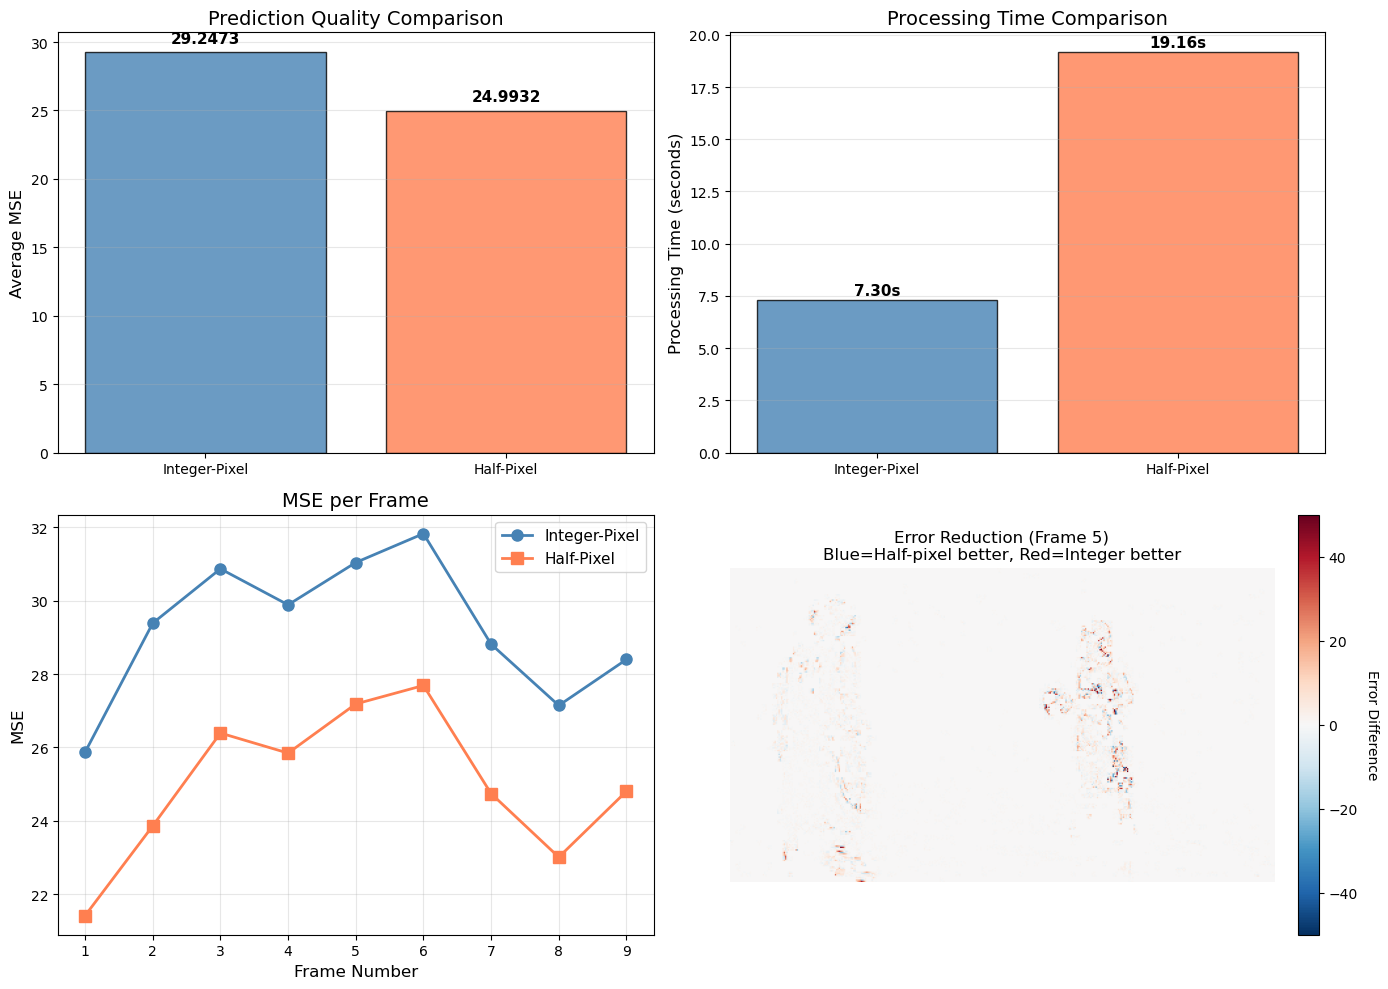

In [11]:
## Task 7

# Parameters from previous tasks
blocksize = 4
search_range = 16
distance_metric = 'ssd'

# Video configuration
input_video = 'sequences/BasketballPass_416x240_50_10frames.yuv'
num_frames = 10
width = 416
height = 240

print(f"\nTest configuration:")
print(f"  Video: {input_video}")
print(f"  Block size: {blocksize}x{blocksize}")
print(f"  Search range: ±{search_range}")
print(f"  Distance metric: {distance_metric.upper()}")
print(f"  Search method: Three-Step Search")
print(f"  Frames to process: {num_frames - 1}")
print()

# Test 1: Integer-pixel accuracy (Three-Step Search)

print("-" * 60)
print("Testing Integer-Pixel Accuracy (Three-Step Search)...")
print("-" * 60)

start_time_int = time.time()
mse_values_int = []

for frame_idx in range(1, num_frames):
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    predicted, _ = predict_frame_three_step(current, reference, blocksize, 
                                            search_range, distance_metric)
    mse = compute_mse(current, predicted)
    mse_values_int.append(mse)

end_time_int = time.time()
time_int = end_time_int - start_time_int
avg_mse_int = np.mean(mse_values_int)

print(f"Integer-pixel processing time: {time_int:.4f} seconds")
print(f"Average MSE: {avg_mse_int:.4f}")
print()

# Test 2: Half-pixel accuracy (Three-Step Search + refinement)

print("-" * 60)
print("Testing Half-Pixel Accuracy (Three-Step + Refinement)...")
print("-" * 60)

start_time_half = time.time()
mse_values_half = []

for frame_idx in range(1, num_frames):
    current, _, _ = read_frame(input_video, frame_idx, width, height)
    reference, _, _ = read_frame(input_video, frame_idx - 1, width, height)
    
    predicted = predict_frame_half_pixel(current, reference, blocksize, 
                                         search_range, use_three_step=True,
                                         distance_metric=distance_metric)
    mse = compute_mse(current, predicted)
    mse_values_half.append(mse)

end_time_half = time.time()
time_half = end_time_half - start_time_int
avg_mse_half = np.mean(mse_values_half)

print(f"Half-pixel processing time: {time_half:.4f} seconds")
print(f"Average MSE: {avg_mse_half:.4f}")
print()

# Performance Comparison

print("=" * 60)
print("Performance Comparison: Integer vs Half-Pixel Accuracy")
print("=" * 60)

mse_improvement = avg_mse_int - avg_mse_half
mse_improvement_percent = (mse_improvement / avg_mse_int) * 100

time_overhead = time_half - time_int
time_overhead_percent = (time_overhead / time_int) * 100

print(f"\n{'Metric':<30} {'Integer-Pixel':<20} {'Half-Pixel':<20} {'Change':<20}")
print("-" * 90)
print(f"{'Processing time (s)':<30} {time_int:<20.4f} {time_half:<20.4f} {time_overhead_percent:+.2f}%")
print(f"{'Average MSE':<30} {avg_mse_int:<20.4f} {avg_mse_half:<20.4f} {mse_improvement_percent:+.2f}%")

print(f"\n{'Summary':<50}")
print("-" * 90)
print(f"MSE improvement: {mse_improvement:.4f} ({mse_improvement_percent:.2f}%)")
print(f"Time overhead: {time_overhead:.4f} seconds ({time_overhead_percent:.2f}%)")

if mse_improvement > 0:
    print(f"\nHalf-pixel accuracy IMPROVES prediction quality by {mse_improvement_percent:.2f}%")
else:
    print(f"\nNote: Half-pixel accuracy did not improve MSE (degradation: {-mse_improvement_percent:.2f}%)")

# Visualization

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: MSE Comparison
methods = ['Integer-Pixel', 'Half-Pixel']
mse_values = [avg_mse_int, avg_mse_half]
colors = ['steelblue', 'coral']

axes[0, 0].bar(methods, mse_values, color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('Average MSE', fontsize=12)
axes[0, 0].set_title('Prediction Quality Comparison', fontsize=14)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (method, mse) in enumerate(zip(methods, mse_values)):
    axes[0, 0].text(i, mse + 0.5, f'{mse:.4f}', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

# Plot 2: Processing Time Comparison
times = [time_int, time_half]

axes[0, 1].bar(methods, times, color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('Processing Time (seconds)', fontsize=12)
axes[0, 1].set_title('Processing Time Comparison', fontsize=14)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, (method, t) in enumerate(zip(methods, times)):
    axes[0, 1].text(i, t + 0.1, f'{t:.2f}s', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

# Plot 3: MSE per Frame
frames = range(1, num_frames)
axes[1, 0].plot(frames, mse_values_int, marker='o', linewidth=2,
                markersize=8, label='Integer-Pixel', color='steelblue')
axes[1, 0].plot(frames, mse_values_half, marker='s', linewidth=2,
                markersize=8, label='Half-Pixel', color='coral')
axes[1, 0].set_xlabel('Frame Number', fontsize=12)
axes[1, 0].set_ylabel('MSE', fontsize=12)
axes[1, 0].set_title('MSE per Frame', fontsize=14)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Visual comparison for one frame
test_frame_idx = 5
current, _, _ = read_frame(input_video, test_frame_idx, width, height)
reference, _, _ = read_frame(input_video, test_frame_idx - 1, width, height)

# Integer-pixel prediction
pred_int, _ = predict_frame_three_step(current, reference, blocksize,
                                       search_range, distance_metric)
error_int = np.abs(current.astype(np.int32) - pred_int.astype(np.int32))

# Half-pixel prediction
pred_half = predict_frame_half_pixel(current, reference, blocksize,
                                     search_range, use_three_step=True,
                                     distance_metric=distance_metric)
error_half = np.abs(current.astype(np.int32) - pred_half.astype(np.int32))

# Show error difference
error_diff = error_int.astype(np.float32) - error_half.astype(np.float32)

im = axes[1, 1].imshow(error_diff, cmap='RdBu_r', vmin=-50, vmax=50)
axes[1, 1].set_title(f'Error Reduction (Frame {test_frame_idx})\nBlue=Half-pixel better, Red=Integer better',
                     fontsize=12)
axes[1, 1].axis('off')
cbar = plt.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar.set_label('Error Difference', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('task7_half_pixel_accuracy.png', dpi=150, bbox_inches='tight')
plt.show()